# Data Training and Prediction - Heli

In [106]:
import pandas as pd

# Create a new DataFrame df_points
df_points = df_all[['District_Name', 'SCHOOL', 'Gender']].copy()

# Calculate the sum of grade points for each category and store them in the new DataFrame
df_points['%0-5_Points'] = df_all['%0-5_Points'] + df_all['%0-5_Points.1'] + df_all['%0-5_Points.2'] + df_all['%0-5_Points.3'] + df_all['%0-5_Points.4']
df_points['%11-15_Points'] = df_all['%11-15_Points'] + df_all['%11-15_Points.1'] + df_all['%11-15_Points.2'] + df_all['%11-15_Points.3'] + df_all['%11-15_Points.4']
df_points['%6-10_Points'] = df_all['%6-10_Points'] + df_all['%6-10_Points.1'] + df_all['%6-10_Points.2'] + df_all['%6-10_Points.3'] + df_all['%6-10_Points.4']
df_points['%16-20_Points'] = df_all['%16-20_Points'] + df_all['%16-20_Points.1'] + df_all['%16-20_Points.2'] + df_all['%16-20_Points.3'] + df_all['%16-20_Points.4']
df_points['%21-25_Points'] = df_all['%21-25_Points'] + df_all['%21-25_Points.1']
# Display the new DataFrame df_points
df_points.head()


,District_Name,SCHOOL,Gender,%0-5_Points,%11-15_Points,%6-10_Points,%16-20_Points,%21-25_Points
0,AMUDAT,POKOT_SECONDARY_SCHOOL,FEMALE,191.7,150.0,58.3,0.0,0.0
1,AMUDAT,POKOT_SECONDARY_SCHOOL,MALE,164.5,37.5,198.0,0.0,0.0
3,PADER,ARCHBP.FLYNN_SECONDARY_SCHOOL,FEMALE,21.4,35.7,42.9,0.0,0.0
4,PADER,ARCHBP.FLYNN_SECONDARY_SCHOOL,MALE,40.9,9.1,50.0,0.0,0.0
5,PADER,PADER_TOWN_HALL_LAGWAI_SEED_SS,FEMALE,256.7,53.3,131.6,58.3,0.0


In [107]:
#Dataset of the proposed features
X = df_points.loc[ : , ["District_Name", "SCHOOL", "Gender"]]
X

,District_Name,SCHOOL,Gender
0,AMUDAT,POKOT_SECONDARY_SCHOOL,FEMALE
1,AMUDAT,POKOT_SECONDARY_SCHOOL,MALE
3,PADER,ARCHBP.FLYNN_SECONDARY_SCHOOL,FEMALE
4,PADER,ARCHBP.FLYNN_SECONDARY_SCHOOL,MALE
5,PADER,PADER_TOWN_HALL_LAGWAI_SEED_SS,FEMALE
...,...,...,...
3909,KIRUHURA,SEDES_SAPIENTIAE_ACADEMIAE_SS,FEMALE
3910,KIRUHURA,SEDES_SAPIENTIAE_ACADEMIAE_SS,MALE
3911,KIRUHURA,"ST.CATHERINE_GIRLS_SCHOOL,KAZO",FEMALE
3912,KIRUHURA,"UNIVERSAL_SECONDARY_SCHOOL,NYABUSHOZI",FEMALE


In [108]:
#Encoding strings to numerical values
from sklearn.preprocessing import LabelEncoder
#Standardisation
district_le = LabelEncoder()
X['District_Name'] = district_le.fit_transform(X['District_Name'])

school_le = LabelEncoder()
X['SCHOOL'] = school_le.fit_transform(X['SCHOOL'])

gender_le = LabelEncoder()
X['Gender'] = gender_le.fit_transform(X['Gender'])
X

,District_Name,SCHOOL,Gender
0,5,1305,0
1,5,1305,1
3,91,64,0
4,91,64,1
5,91,1283,0
...,...,...,...
3909,51,1400,0
3910,51,1400,1
3911,51,1488,0
3912,51,1767,0


In [109]:
#Dataset of the targets
y = df_points[['%0-5_Points', '%11-15_Points',
       '%6-10_Points', '%16-20_Points', '%21-25_Points']]
y

,%0-5_Points,%11-15_Points,%6-10_Points,%16-20_Points,%21-25_Points
0,191.7,150.0,58.3,0.0,0.0
1,164.5,37.5,198.0,0.0,0.0
3,21.4,35.7,42.9,0.0,0.0
4,40.9,9.1,50.0,0.0,0.0
5,256.7,53.3,131.6,58.3,0.0
...,...,...,...,...,...
3909,65.4,33.3,96.7,0.0,0.0
3910,20.2,82.9,85.8,11.1,0.0
3911,47.6,111.1,241.3,0.0,0.0
3912,220.0,21.7,141.7,16.7,0.0


In [110]:
#Future selection
#MultiTaskLassoCV model is created and performs feature selection and helps to identify the most influential features for predicting the target variables.
from sklearn.linear_model import MultiTaskLassoCV
reg = MultiTaskLassoCV() #MultiTaskLassoCV is used to reward coefficents of features positively/negatively. Features without effects are dropped.
reg.fit(X, y)
print("Best alpha using built-in MultiTaskLassoCV: %f" %reg.alpha_)
print("Best score using built-in MultiTaskLassoCV: %f" %reg.score(X,y))

Best alpha using built-in MultiTaskLassoCV: 7.223602
Best score using built-in MultiTaskLassoCV: 0.020914


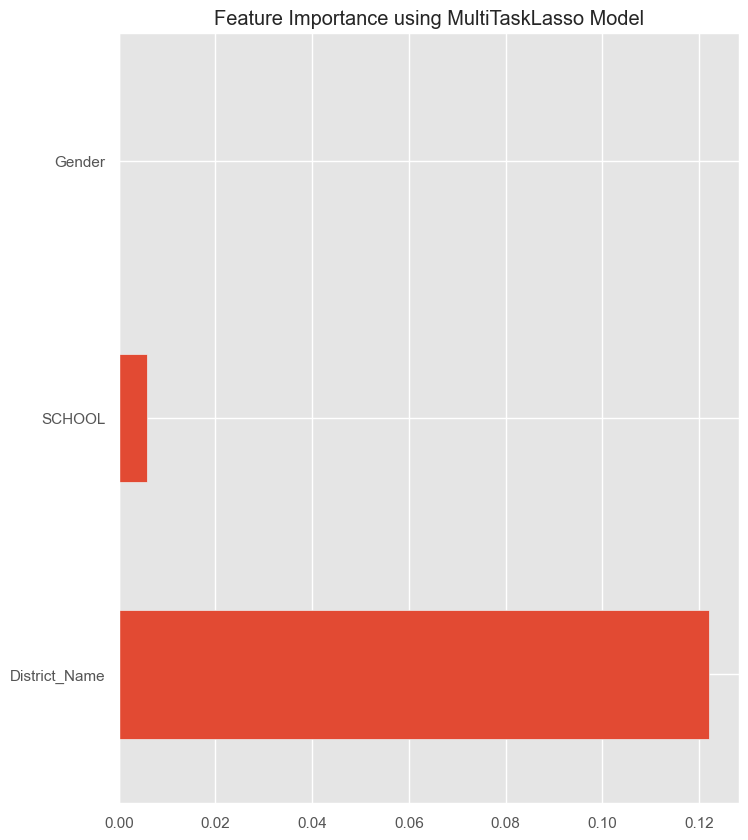

In [111]:
#Taking any random row from coefficient array: row(coefficient threshold: 7)
import matplotlib.pyplot as plt
import pandas as pd

# Feature Importance Visualization:
coef1 = pd.Series(reg.coef_[3], index=X.columns)
plt.rcParams['figure.figsize'] = (8.0, 10.0)
coef1.plot(kind="barh")
plt.title("Feature Importance using MultiTaskLasso Model")
plt.show()

In [112]:
#Feature Removal
#As observed above, Gender is not suitable for features for modeling, thus eliminated
X.drop(["Gender"], axis=1, inplace=True)
X

,District_Name,SCHOOL
0,5,1305
1,5,1305
3,91,64
4,91,64
5,91,1283
...,...,...
3909,51,1400
3910,51,1400
3911,51,1488
3912,51,1767


In [113]:
#Creating a MultiRegression Ridge model
from sklearn.multioutput import MultiOutputRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#split dataset into test and training data
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.10)
#training the model
gbr = GradientBoostingRegressor()
#create multiple parallel instances of the estimator (Gradient Boosting Regressor) 
model = MultiOutputRegressor(estimator=gbr).fit(xtrain, ytrain)

#determine Score of model in approximating targets 
score = model.score(xtrain, ytrain)
print("Training score:", score)

Training score: 0.29435727485566127


In [114]:
# Model Evaluation(Training score is calculated on target columns)
#Prediction of the targets(yprediction) by model on test data
yprediction = model.predict(xtest)

#Target column names 
ylabel = ytest.columns

#Iterating through the field of predicted variables getting the mean_squared_error in predicting the actual target
for i in range(yprediction.shape[1]):
    print(ylabel[i]+" MSE: %4f\n" %mean_squared_error(yprediction[:,i], ytest[ylabel[i]]))

%0-5_Points MSE: 5903.601345

%11-15_Points MSE: 3103.436004

%6-10_Points MSE: 4781.628458

%16-20_Points MSE: 1246.624135

%21-25_Points MSE: 60.972960



Relation between predicted and actual percentage grades


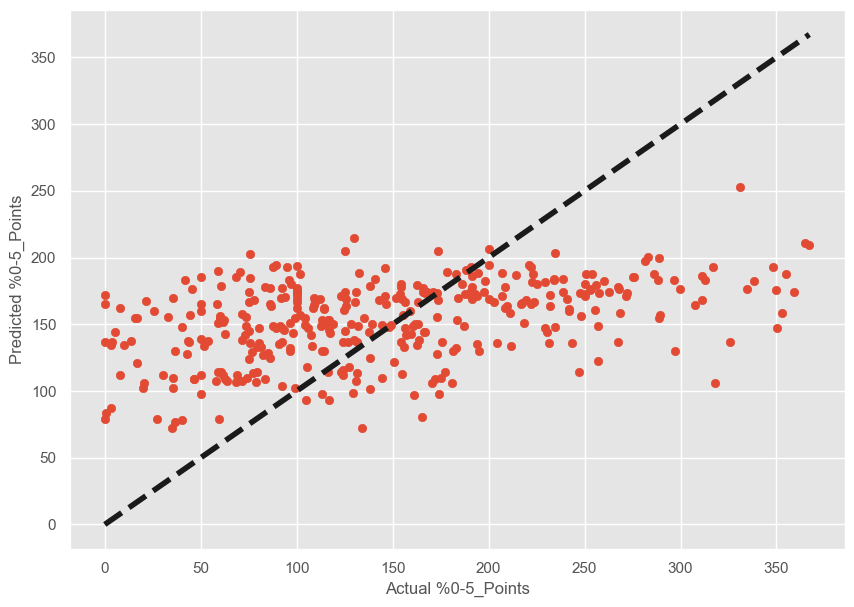

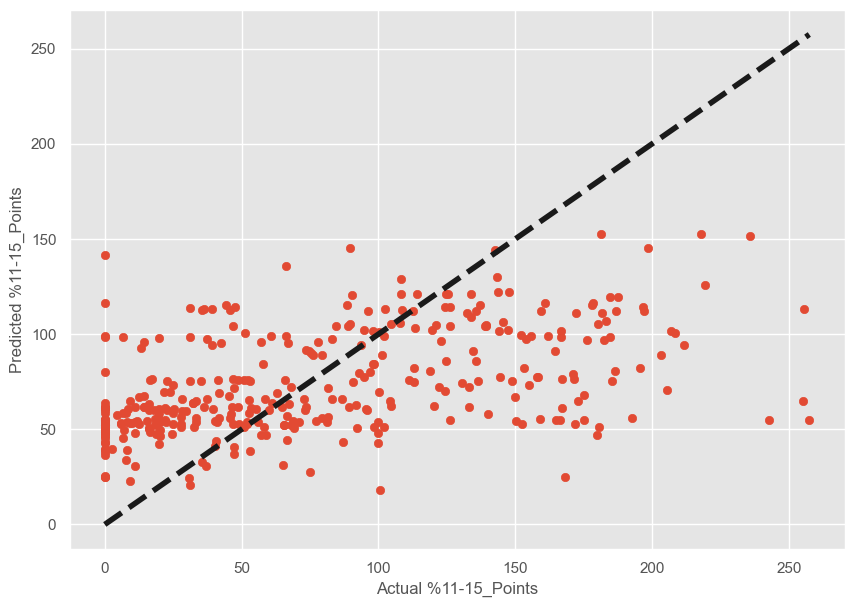

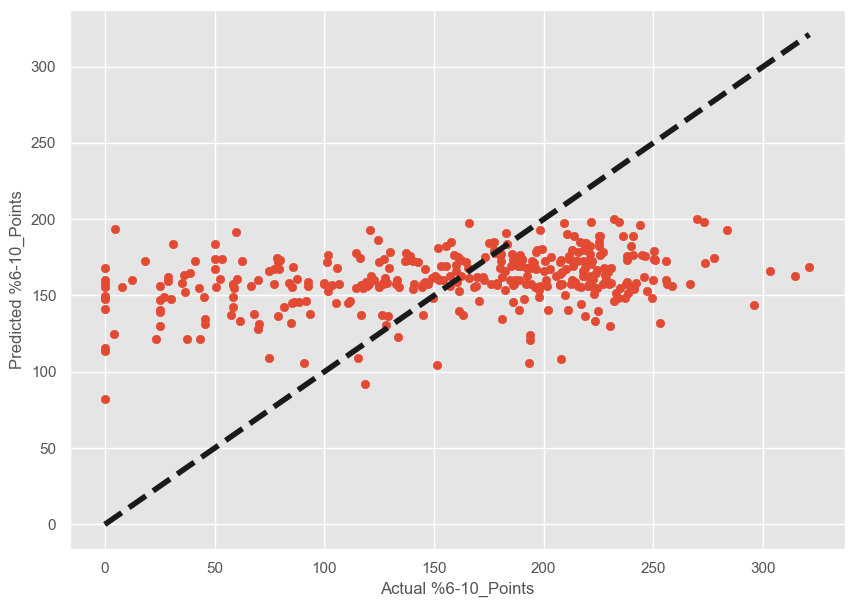

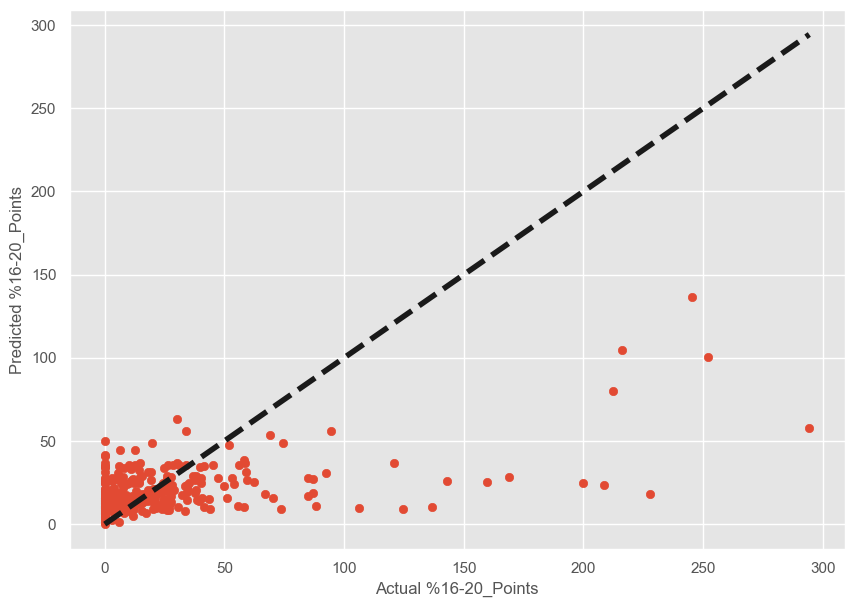

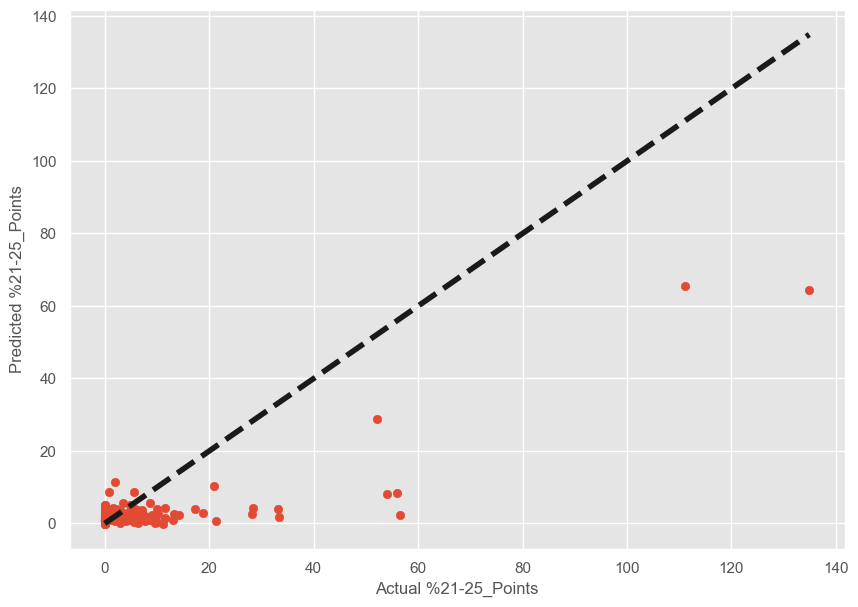

In [115]:
#Relation between predicted and actual points
print("Relation between predicted and actual percentage grades")
for i in range (yprediction.shape[1]):
    fig, ax = plt.subplots(figsize=(10, 7)) 
    ax. scatter (ytest[ylabel [i]], yprediction [:,i])
    ax.plot([ytest[ylabel[i]].min(),ytest[ylabel[i]].max()],[ytest[ylabel[i]].min(),ytest[ylabel[i]].max()],'k--',lw=4)
    ax.set_xlabel("Actual %s" %ylabel [i])
    ax.set_ylabel("Predicted %s" %ylabel [i])
    plt.show()